In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
data = pd.read_csv(r"/home/seth/Downloads/utility/Consumption-hourly-8941355284-06-Apr-2024.csv",                                      parse_dates=['Period'],
                   index_col='Period',
                )

In [3]:
data.describe()

,Current
count,672.000000
mean,0.221760
std,0.245141
min,0.000000
25%,0.128000
50%,0.159000
75%,0.209250
max,2.206000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 672 entries, 2024-03-24 00:00:00 to 2024-04-06 23:30:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Current  672 non-null    float64
dtypes: float64(1)
memory usage: 10.5 KB


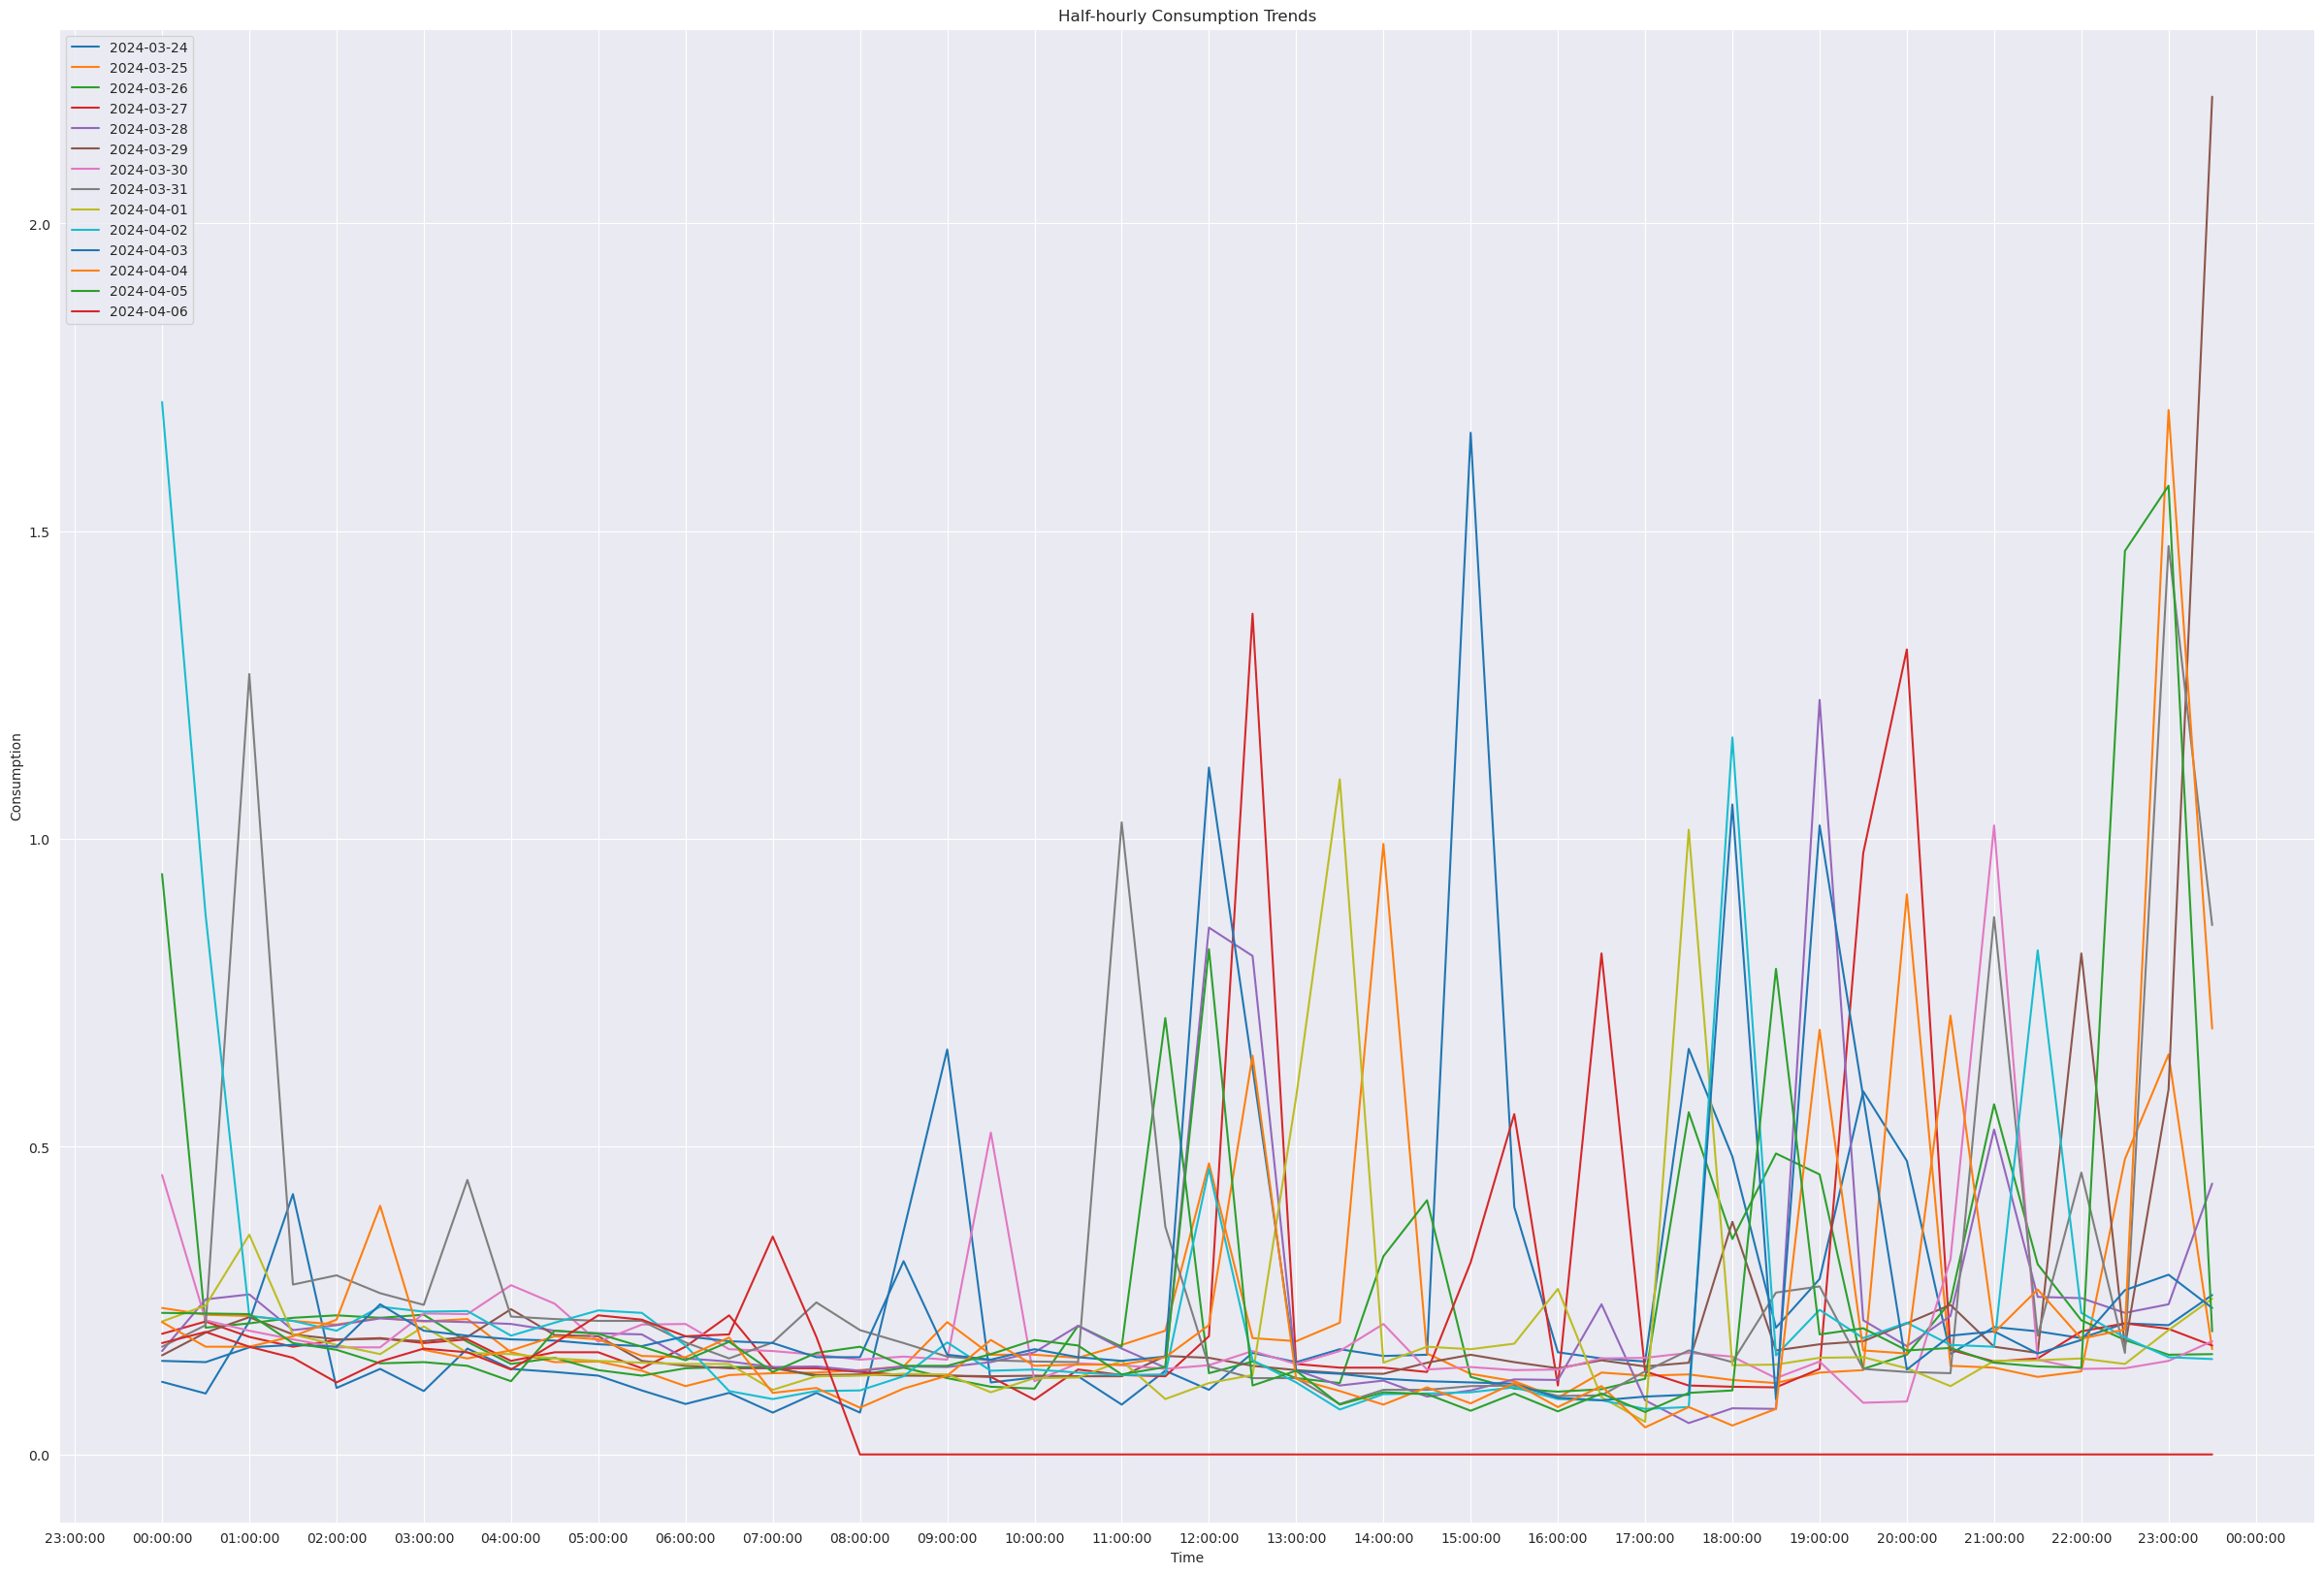

In [5]:
# Create a new figure and axes with increased size
fig, ax = plt.subplots(figsize=(30, 20))

# For each day, plot the consumption trends
for date, group in data.groupby(data.index.date):
    # Convert 'time' to matplotlib date format
    time = [mdates.date2num(pd.Timestamp(dt.time().isoformat())) for dt in group.index]
    ax.plot(time, group['Current'], label=date)

# Set the x-axis label
ax.set_xlabel('Time')

# Format x-tick labels as 24-hour clock and set them for every record
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))   # to get a tick every hour
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=30))  # to get a tick every 30 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))  # format x-tick labels as 24-hour clock

# Set the y-axis label
ax.set_ylabel('Consumption')

# Set the title
ax.set_title('Half-hourly Consumption Trends')

# Display the legend
ax.legend()

# Show the plot
plt.show()